<a href="https://colab.research.google.com/github/chminPark/ml-python/blob/master/%EC%8B%A4%EC%8A%B5_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stochastic Gradient Descent의 개념을 이해한다 
* Loss계산 후 Step Loss를 줄이기 위해 학습이 진행됩니다. 
* Gradient(기울기)는 Loss의 기울기 입니다

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning1.png" height="200px" width="300px">

<img src="https://miro.medium.com/max/1400/1*zoywHDM6_AdN2LmQbro9Iw.webp" height="150px" width="350px">


* Learning의 크기는 학습속도에 영향을 미칩니다. 너무 크면 학습이 안될 수도 있습니다 

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning3.png" height="200px" width="500px">

https://moding.tistory.com/entry/Pytorch로-Fashion-MNIST-구현하기
 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

torch.__version__

'1.13.0+cu116'

Initial Weights: tensor([-0.5729, -0.3759,  1.8067], requires_grad=True)
Initial Cost: 156.26319885253906
Epoch    1/1000 a: -0.540, b: -0.374, c: 1.807, Cost: 153.515518
Epoch  101/1000 a: 0.341, b: -0.312, c: 1.814, Cost: 25.726553
Epoch  201/1000 a: 0.341, b: -0.303, c: 1.819, Cost: 25.716951
Epoch  301/1000 a: 0.341, b: -0.295, c: 1.825, Cost: 25.707514
Epoch  401/1000 a: 0.340, b: -0.287, c: 1.830, Cost: 25.698118
Epoch  501/1000 a: 0.340, b: -0.279, c: 1.835, Cost: 25.688768
Epoch  601/1000 a: 0.339, b: -0.271, c: 1.840, Cost: 25.679462
Epoch  701/1000 a: 0.339, b: -0.263, c: 1.845, Cost: 25.670202
Epoch  801/1000 a: 0.338, b: -0.255, c: 1.851, Cost: 25.660982
Epoch  901/1000 a: 0.337, b: -0.247, c: 1.856, Cost: 25.651808


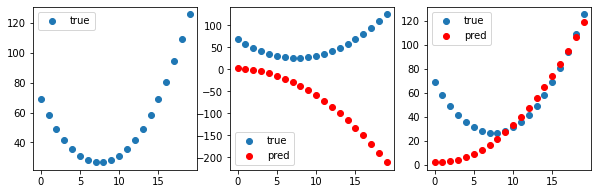

In [ ]:
# Quadratic function
def hypothesis(x, coefficients):
    a,b,c = coefficients
    return a*(x**2)+(b*x)+c


##### RMSE Loss를 구현해 본다. 
def rmse(preds, targets):
    return ((preds-targets)**2).mean().sqrt()
#####


def show_predicted(x, y, preds, ax=None):
    if ax is None: 
      ax=plt.subplots(figsize=(3,3))[1]
    ax.scatter(x,y, label='true')

    if preds is not None:
      ax.scatter(x, preds, label='pred', color='red')
    ax.legend()



x_train = torch.arange(0,20).float()
y_train = x_train*3 + 0.75*((x_train-9.5)**2)+1



fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train,y_train, None, ax[0])

params = torch.randn(3).requires_grad_()
print(f"Initial Weights: {params}")

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[1])

# RMSE loss
cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")


# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)

### Learning Rate를 0.0001, 0.1, 0.00000001 에 대해 실험해 본다. 
optimizer = torch.optim.SGD([params], lr=0.0001) 

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    ##### 예측값을 생성해 본다. 
    preds = hypothesis(x_train, params)
    #####
    
    # cost 계산
    cost = rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산

    ##### 계산된 gradient 값을 이용하여 W,b 업데이트하는 Step을 구현한다
    optimizer.step() 
    #####


    # 100번마다 로그 출력
    if epoch % 100 == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, c: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), params[2].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[2])

Initial Weight: tensor([0.], requires_grad=True) and Bias: tensor([0.], requires_grad=True)
Epoch    0/1000 W: 0.022, b: 0.010 Cost: 5.259911
Epoch  100/1000 W: 2.031, b: 0.928 Cost: 0.028261
Epoch  200/1000 W: 1.990, b: 0.994 Cost: 0.027731
Epoch  300/1000 W: 1.989, b: 0.995 Cost: 0.027732
Epoch  400/1000 W: 1.989, b: 0.995 Cost: 0.027736
Epoch  500/1000 W: 1.989, b: 0.995 Cost: 0.027736
Epoch  600/1000 W: 1.989, b: 0.995 Cost: 0.027736
Epoch  700/1000 W: 1.989, b: 0.995 Cost: 0.027736
Epoch  800/1000 W: 1.989, b: 0.995 Cost: 0.027736
Epoch  900/1000 W: 1.989, b: 0.995 Cost: 0.027736
Epoch 1000/1000 W: 1.989, b: 0.995 Cost: 0.027736


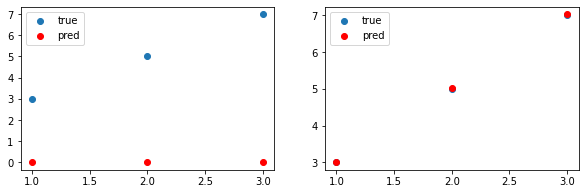

In [ ]:
import torch 
from torch import optim

# y = 2x +1 데이터를 확인한다 
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[3], [5], [7]])

# Weight와 Bias를 0으로 초기화 
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

print(f"Initial Weight: {W} and Bias: {b}")

hypothesis = x_train * W + b

# RMSE loss
cost = rmse(preds,  y_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train,y_train, hypothesis.detach().numpy(), ax[0])

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    hypothesis = x_train * W + b
    # cost 계산
    cost = rmse(hypothesis,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트

    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

show_predicted(x_train,y_train, hypothesis.detach().numpy(), ax[1])


## 데이터의 형태를 알아도 잘 학습이 안되는 경우

Initial Weights: tensor([ 2.0914,  1.6083, -0.7312, -0.6675], requires_grad=True)
Initial Cost: 782587.5
Epoch    1/1000 a: 2.139, b: 1.597, c: -0.731, d: -0.668, Cost: 127155344.000000
Epoch  101/1000 a: 3.462, b: 1.189, c: -0.744, d: -0.668, Cost: 126684104.000000
Epoch  201/1000 a: 4.167, b: 0.885, c: -0.753, d: -0.668, Cost: 126432912.000000
Epoch  301/1000 a: 4.680, b: 0.625, c: -0.760, d: -0.668, Cost: 126250568.000000
Epoch  401/1000 a: 5.091, b: 0.391, c: -0.767, d: -0.668, Cost: 126104672.000000
Epoch  501/1000 a: 5.436, b: 0.176, c: -0.774, d: -0.668, Cost: 125982240.000000
Epoch  601/1000 a: 5.736, b: -0.024, c: -0.779, d: -0.669, Cost: 125875736.000000
Epoch  701/1000 a: 6.002, b: -0.214, c: -0.785, d: -0.669, Cost: 125781488.000000
Epoch  801/1000 a: 6.243, b: -0.393, c: -0.790, d: -0.669, Cost: 125696064.000000
Epoch  901/1000 a: 6.460, b: -0.565, c: -0.795, d: -0.669, Cost: 125619040.000000


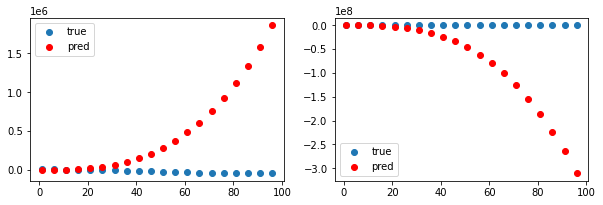

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float() # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000

def hypothesis(x, coefficients):
    a,b,c,d = coefficients
    return a*(x**3)+b*(x**2)+c*x+d

# 학습해야 하는 
params = torch.randn(4).requires_grad_()
print(f"Initial Weights: {params}")

preds = hypothesis(x_train, params)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD([params], lr=0.001)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = hypothesis(x_train, params)
    # cost 계산
    cost =  rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 100번마다 로그 출력
    if epoch % 100 == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, c: {:.3f}, d: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), params[2].item(), params[3].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])

nn.Linear()를 이용하여 위 문제를 해결해 봅시다

Initial Weights: [Parameter containing:
tensor([[0.4151]], requires_grad=True), Parameter containing:
tensor([0.2381], requires_grad=True)]
Initial Cost: 30039.662109375
Epoch    1/1000,  Cost: 29731.314453
Epoch  101/1000,  Cost: 5713.770996
Epoch  201/1000,  Cost: 5327.878906
Epoch  301/1000,  Cost: 5326.147949
Epoch  401/1000,  Cost: 5324.419434
Epoch  501/1000,  Cost: 5322.691406
Epoch  601/1000,  Cost: 5320.964355
Epoch  701/1000,  Cost: 5319.238281
Epoch  801/1000,  Cost: 5317.511719
Epoch  901/1000,  Cost: 5315.786621
Train accuracy(RMSE) :  5314.06201171875


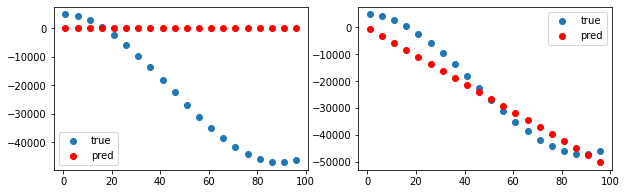

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000


# 학습해야 하는 

model = nn.Linear(in_features=1, out_features=1, bias=True)
print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.1)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost =  rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 100번마다 로그 출력
    if epoch % 100 == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

Initial Weights: [Parameter containing:
tensor([[ 0.0533],
        [ 0.8500],
        [ 0.8185],
        [-0.8917],
        [ 0.6315]], requires_grad=True), Parameter containing:
tensor([ 0.6540,  0.7202,  0.9343,  0.8975, -0.4504], requires_grad=True), Parameter containing:
tensor([[-0.3978,  0.4117,  0.4358,  0.3238, -0.2961],
        [-0.3828,  0.0635,  0.2023,  0.3314, -0.3015],
        [ 0.3402, -0.1925,  0.4333,  0.1128,  0.2954],
        [ 0.0692, -0.3770, -0.0098,  0.1393,  0.3722],
        [-0.2034, -0.1227, -0.3796,  0.1247, -0.3436]], requires_grad=True), Parameter containing:
tensor([-0.3274,  0.4289, -0.0619,  0.3402, -0.2751], requires_grad=True), Parameter containing:
tensor([[-0.2361,  0.0395, -0.3093, -0.0896,  0.2082]], requires_grad=True), Parameter containing:
tensor([0.2024], requires_grad=True)]
Initial Cost: 30000.216796875
Epoch    1/1000,  Cost: 29999.753906
Epoch  101/1000,  Cost: 29828.625000
Epoch  201/1000,  Cost: 5343.250488
Epoch  301/1000,  Cost: 5335.21

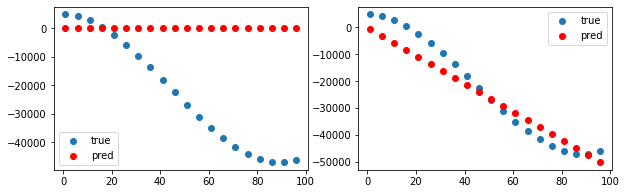

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000


# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다

model = nn.Sequential(nn.Linear(in_features=1, out_features=5, bias=True),
                      nn.Linear(in_features=5, out_features=5, bias=True),
                      nn.Linear(in_features=5, out_features=1, bias=True)
                      )
 
print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0001)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost =  rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 100번마다 로그 출력
    if epoch % 100 == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

## Neural Network 는 nn.Module을 이용하여 객체로 표현합니다. 

* 위에 실습한 내용을 nn.Module을 이용하여 수정해 봅시다

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png" height="300px" width="700px">



In [ ]:
class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(in_features=1, out_features=5, bias=True),
                                nn.Linear(in_features=5, out_features=5, bias=True),
                                nn.Linear(in_features=5, out_features=1, bias=True)
                  )

  def forward(self, x):
      return self.linear(x)

Initial Cost: 30595.232421875
Epoch    1/10000,  Cost: 30594.859375
Epoch 1001/10000,  Cost: 5391.649414
Epoch 2001/10000,  Cost: 5361.312012
Epoch 3001/10000,  Cost: 5329.682129
Epoch 4001/10000,  Cost: 5294.503906
Epoch 5001/10000,  Cost: 5252.399902
Epoch 6001/10000,  Cost: 5197.321777
Epoch 7001/10000,  Cost: 5116.819336
Epoch 8001/10000,  Cost: 4982.596680
Epoch 9001/10000,  Cost: 4730.465332


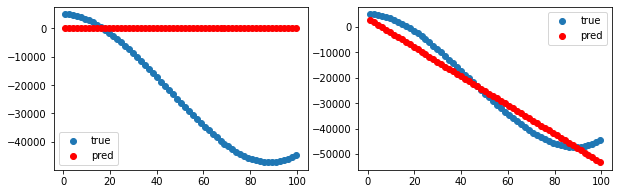

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
x_train = torch.arange(1,100,1.7).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000


# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다

model = LinearRegressionModel()
 
# print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
#optimizer = torch.optim.SGD( model.parameters(), lr=0.000015)
optimizer = torch.optim.SGD( model.parameters(), lr=0.00005)

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost =  rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 1000번마다 로그 출력
    if epoch % 1000 == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])

Initial Cost: 30571.3046875
Epoch    1/10000,  Cost: 30570.869141
Epoch 1001/10000,  Cost: 5353.694824
Epoch 2001/10000,  Cost: 5286.311523
Epoch 3001/10000,  Cost: 5189.407715
Epoch 4001/10000,  Cost: 4991.618652
Epoch 5001/10000,  Cost: 4976.750000
Epoch 6001/10000,  Cost: 4850.223145
Epoch 7001/10000,  Cost: 4744.508789
Epoch 8001/10000,  Cost: 4644.729004
Epoch 9001/10000,  Cost: 4560.925781


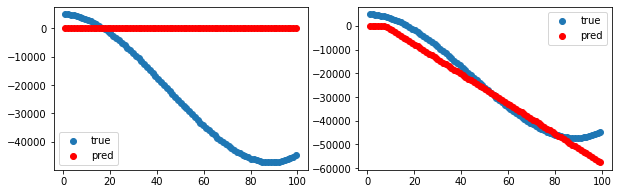

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
x_train = torch.arange(1,100,1.2).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000

class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(in_features=1, out_features=5, bias=True),
                                nn.ReLU(),
                                nn.Linear(in_features=5, out_features=5, bias=True),
                                nn.ReLU(),
                                nn.Linear(in_features=5, out_features=1, bias=True),
                            )

  def forward(self, x):
      return self.linear(x)

# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LinearRegressionModel()
 
# print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
#optimizer = torch.optim.SGD( model.parameters(), lr=0.000015)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0001)

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds,  y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 1000번마다 로그 출력
    if epoch % 1000 == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])

### 데이터를 대해 Train, Validation, Test용으로 나누는 실습을 한다 
* 학습부/평가부를 나누어야 한다 
* Multivariate 한 입력을 처리하는 실습을 한다

In [ ]:
from sklearn.model_selection import train_test_split

def get_train_testset(X,y, tensor=False, show=True):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  if show:
    fig, ax = plt.subplots(1,2, figsize=(5,2))
    ax[0].scatter(X_train, y_train, s=100)
    ax[1].scatter(X_test, y_test, s=100)

  if tensor:
    X_train = torch.from_numpy(X_train).float()
    y_train = torch.from_numpy(y_train).float()
    #X_train = x_train.view(X_train.size(0), -1)
    #y_train = y_train.view(y_train.size(0), -1)

    X_test = torch.from_numpy(X_test).float()
    y_test = torch.from_numpy(y_test).float()
    #X_test = X_test.view(X_test.size(0), -1)
    #y_test = y_test.view(y_test.size(0), -1)

  return X_train, X_test, y_train, y_test

Initial Cost: 29422.017578125
Epoch    1/100000, Cost_train: 29421.978516, Cost_val: 27712.205078
Epoch 10001/100000, Cost_train: 3517.961426, Cost_val: 3125.737549
Epoch 20001/100000, Cost_train: 2871.091309, Cost_val: 3455.504395
Epoch 30001/100000, Cost_train: 2515.645752, Cost_val: 2853.932861
Epoch 40001/100000, Cost_train: 2377.968750, Cost_val: 2628.193359
Epoch 50001/100000, Cost_train: 2498.940186, Cost_val: 2287.868164
Epoch 60001/100000, Cost_train: 2343.754395, Cost_val: 1553.648804
Epoch 70001/100000, Cost_train: 3189.262207, Cost_val: 1109.713989
Epoch 80001/100000, Cost_train: 997.793579, Cost_val: 2454.334229
Epoch 90001/100000, Cost_train: 1255.775513, Cost_val: 2838.122314
Train accuracy(RMSE) :  998.219482421875
Test accuracy(RMSE) : 1310.677490234375


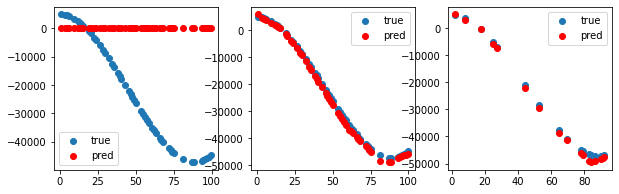

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정

x = torch.arange(1,100,1.2).float().unsqueeze(1) # start, stop, step
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000
x_train, x_test, y_train, y_test = get_train_testset(x,y, show=False)
x_train, x_val, y_train, y_val = get_train_testset(x_train,y_train, show=False)

class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(in_features=1, out_features=10, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=10, out_features=10, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=10, out_features=5, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=5, out_features=1, bias=True),
                            )

  def forward(self, x):
      return self.linear(x)

# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LinearRegressionModel()
 
# print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    preds_val = model(x_val)
    # cost 계산
    cost_val = torch.sqrt(nn.MSELoss()(preds_val, y_val))


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost_train: {cost.item():.6f}, Cost_val: {cost_val.item():.6f}')

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
show_predicted(x_test, y_test, preds_test.detach().numpy(),ax[2])

Initial Cost: 29422.017578125
Epoch    1/300000, Cost_train: 29421.978516, Cost_val: 27712.205078
Epoch 30001/300000, Cost_train: 2515.645752, Cost_val: 2853.932861
Epoch 60001/300000, Cost_train: 2343.754395, Cost_val: 1553.648804
Epoch 90001/300000, Cost_train: 1255.775513, Cost_val: 2838.122314
Epoch 120001/300000, Cost_train: 913.795288, Cost_val: 3016.693848
Epoch 150001/300000, Cost_train: 751.010803, Cost_val: 2991.822510
Epoch 180001/300000, Cost_train: 902.087158, Cost_val: 2887.772949
Epoch 210001/300000, Cost_train: 849.581665, Cost_val: 2897.920410
Epoch 240001/300000, Cost_train: 715.324097, Cost_val: 2812.598145
Epoch 270001/300000, Cost_train: 841.139099, Cost_val: 2823.304443
Train accuracy(RMSE) :  727.8648071289062
Test accuracy(RMSE) : 1242.1473388671875


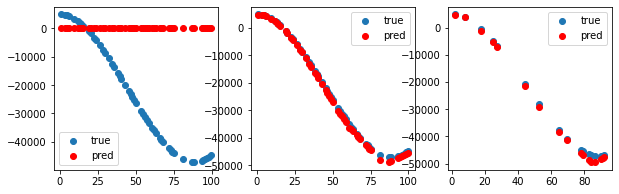

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정

x = torch.arange(1,100,1.2).float().unsqueeze(1) # start, stop, step
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000
x_train, x_test, y_train, y_test = get_train_testset(x,y, show=False)
x_train, x_val, y_train, y_val = get_train_testset(x_train,y_train, show=False)

class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(in_features=1, out_features=10, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=10, out_features=10, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=10, out_features=5, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=5, out_features=1, bias=True),
                            )

  def forward(self, x):
      return self.linear(x)

# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LinearRegressionModel()
 
# print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

nb_epochs = 300000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    preds_val = model(x_val)
    # cost 계산
    cost_val = torch.sqrt(nn.MSELoss()(preds_val, y_val))


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost_train: {cost.item():.6f}, Cost_val: {cost_val.item():.6f}')

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
show_predicted(x_test, y_test, preds_test.detach().numpy(),ax[2])

# Sklearn examples

Error yf_linear: 3269.227433
Error yf_squared: 2704.302959
Error yf_cubic: 0.000000


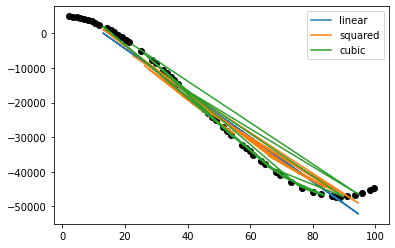

In [ ]:
from sklearn.linear_model import (
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
)

x = np.arange(1,100,1.2) # start, stop, step
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000

x_train, x_test, y_train, y_test = get_train_testset(x,y, show=False)
x_train, x_val, y_train, y_val = get_train_testset(x_train,y_train, show=False)

plt.scatter(x_train, y_train, color="black")

model_linear= LinearRegression() #random_state=20)
model_squared= LinearRegression() #random_state=20)
model_cubic= LinearRegression() #random_state=20)

x2=x_train**2
x3=x_train**3

model_linear.fit(np.vstack([x_train]).T, y_train)
model_squared.fit(np.vstack([x_train,x2]).T, y_train)
model_cubic.fit(np.vstack([x_train,x2,x3]).T, y_train)


yf_linear=model_linear.predict(np.vstack([x_test]).T)
yf_squared=model_squared.predict(np.vstack([x_test,x_test**2]).T)
yf_cubic=model_cubic.predict(np.vstack([x_test,x_test**2,x_test**3]).T)

plt.plot(x_test,yf_linear, label="linear")
plt.plot(x_test,yf_squared, label="squared")
plt.plot(x_test,yf_cubic, label="cubic")
plt.legend()

from sklearn.metrics import mean_squared_error
print (f"Error yf_linear: {mean_squared_error(y_test, yf_linear, squared=False):.6f}")
print (f"Error yf_squared: {mean_squared_error(y_test, yf_squared, squared=False):.6f}")
print (f"Error yf_cubic: {mean_squared_error(y_test, yf_cubic, squared=False):.6f}")

### multivariate 입력을 활용하여 아래 모듈들을 실습해 본다. 
* MLP 
* LSTM
* TCN

In [ ]:
#importing the inbuilt dataset in sklearn package for performing regression analysis.
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
print(f"feature names: {diabetes.feature_names }")
print(f"data shape: {diabetes.data.shape}")

feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
data shape: (442, 10)


In [ ]:
import pandas as pd

df_data = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_data['target'] = diabetes.target # add target
df_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## 데이터 확인 
 * 데이터에 NaN이 있는지 확인
 * 인자간 상관관계 확인

In [ ]:
df_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [ ]:
print(df_data.isna().sum())
print(f"NaN Exist = {df_data.isna().any().any()}")

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
NaN Exist = False


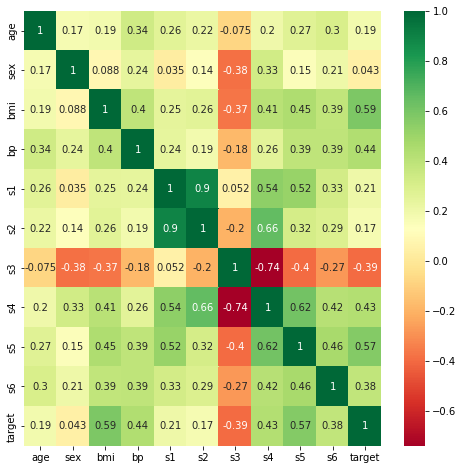

In [ ]:
import seaborn as sns
plt.subplots(figsize=(8,8))
sns.heatmap(df_data.corr(),cmap= 'RdYlGn',annot=True)
plt.show()


In [ ]:

#independent variables / explanatory variables
x = df_data.drop(labels='target', axis=1)  #axis=1 means we drop data by column.

#dependent variable / response / target variable.
y = df_data['target']


((442, 10), (442,))

In [ ]:
x_train, x_test, y_train, y_test = get_train_testset(x.values,y.values, tensor=True, show=False)
x_train, x_val, y_train, y_val = get_train_testset(x_train,y_train,  show=False)

y_train = y_train.view(-1,1)
y_val = y_val.view(-1,1)
y_test = y_test.view(-1,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


torch.Size([282, 10])
torch.Size([89, 10])
torch.Size([282, 1])
torch.Size([89, 1])


Initial Cost: 173.44671630859375
Epoch    1/100000, Cost_train: 173.446411, Cost_val: 167.270981
Epoch 10001/100000, Cost_train: 76.248444, Cost_val: 67.492172
Epoch 20001/100000, Cost_train: 54.097946, Cost_val: 51.211700
Epoch 30001/100000, Cost_train: 53.468353, Cost_val: 51.281590
Epoch 40001/100000, Cost_train: 52.989899, Cost_val: 50.978058
Epoch 50001/100000, Cost_train: 52.657238, Cost_val: 50.581554
Epoch 60001/100000, Cost_train: 52.373421, Cost_val: 50.214882
Epoch 70001/100000, Cost_train: 51.988430, Cost_val: 49.718288
Epoch 80001/100000, Cost_train: 51.539169, Cost_val: 49.259758
Epoch 90001/100000, Cost_train: 51.071453, Cost_val: 48.869179
Train accuracy(RMSE) :  50.65240478515625
Test accuracy(RMSE) : 55.049381256103516


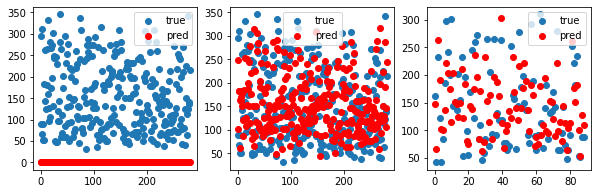

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정


class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(in_features=10, out_features=30, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=30, out_features=30, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=30, out_features=5, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=5, out_features=1, bias=True),
                            )

  def forward(self, x):
      return self.linear(x)

# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LinearRegressionModel()
preds = model(x_train)

fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    preds_val = model(x_val)
    # cost 계산
    cost_val = torch.sqrt(nn.MSELoss()(preds_val, y_val))


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost_train: {cost.item():.6f}, Cost_val: {cost_val.item():.6f}')

preds = model(x_train)
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
show_predicted(range(x_test.shape[0]), y_test, preds_test.detach().numpy(),ax[2])

# LSTM 구현

* LSTM Arcitecture

<img src="https://api.wandb.ai/files/sauravmaheshkar/images/projects/445540/3b5df3df.png
" height="200px" width="300px">


* L = Sequence Length
* N = Batch Size
* Hin=input_size (=num of features)

* tensor shape (L,Hin) for unbatched input
* tensor shape (N, L, Hin) when batch_first=True
* tensor shape (L, N, Hin) when batch_forst=False

* num_layers는 LSTM의 개수를 의미함

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FVJ2Yi%2FbtrE4VSN4tw%2FwO0TxP67kQqpOJiN0vP3N0%2Fimg.png
" height="150px" width="400px">


https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

https://hongl.tistory.com/247

https://ok-lab.tistory.com/209

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
df_data = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_data['target'] = diabetes.target # add target
x_train, x_test, y_train, y_test = get_train_testset(x.values,y.values, tensor=True, show=False)
x_train, x_val, y_train, y_val = get_train_testset(x_train,y_train,  show=False)

y_train = y_train.view(-1,1)
y_val = y_val.view(-1,1)
y_test = y_test.view(-1,1)


# 입력 길이는 1
x_train = torch.reshape(x_train,   (x_train.shape[0], 1, x_train.shape[1]))
x_val = torch.reshape(x_val,   (x_val.shape[0], 1, x_val.shape[1]))
x_test = torch.reshape(x_test,  (x_test.shape[0], 1, x_test.shape[1])) 


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([282, 1, 10])
torch.Size([89, 1, 10])
torch.Size([282, 1])
torch.Size([89, 1])


In [ ]:
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

class LSTM(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers):
    super(LSTM, self).__init__()
    self.num_classes = num_classes 
    self.num_layers = num_layers 
    self.input_size = input_size 
    self.hidden_size = hidden_size 
 
    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                      num_layers=num_layers, batch_first=True) #lstm
    self.fc =  nn.Sequential(nn.Linear(hidden_size, int(hidden_size/2)), 
                             nn.ReLU(),
                             nn.Linear(int(hidden_size/2), num_classes) 
    )

     

  def forward(self,x):
    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))  
    
    # Propagate input through LSTM
    output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
   
    hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next

    batch_size = x.shape[0]

    out = self.fc(hn[-batch_size:,:]) #Final Output
   
    return out 

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정


# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LSTM(num_classes=1, input_size=10, hidden_size=50, num_layers=1)
preds = model(x_train)

fig, ax = plt.subplots(1,3, figsize=(10,3))

show_predicted(np.arange(0, x_train.shape[0]), y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    preds_val = model(x_val)
    # cost 계산
    cost_val = torch.sqrt(nn.MSELoss()(preds_val, y_val))


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost_train: {cost.item():.6f}, Cost_val: {cost_val.item():.6f}')

preds = model(x_train)
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
show_predicted(range(x_test.shape[0]), y_test, preds_test.detach().numpy(),ax[2])

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정


# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LSTM(num_classes=1, input_size=10, hidden_size=50, num_layers=2)
preds = model(x_train)

fig, ax = plt.subplots(1,3, figsize=(10,3))

show_predicted(np.arange(0, x_train.shape[0]), y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    preds_val = model(x_val)
    # cost 계산
    cost_val = torch.sqrt(nn.MSELoss()(preds_val, y_val))


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost_train: {cost.item():.6f}, Cost_val: {cost_val.item():.6f}')

preds = model(x_train)
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
show_predicted(range(x_test.shape[0]), y_test, preds_test.detach().numpy(),ax[2])

RuntimeError: ignored

## 이전까지는 Sequence 길이가 1인 경우였음. Sequence길이가 N개인 경우는?

In [ ]:
https://panggu15.github.io/sequence/(심화)-딥러닝-삼성-주가-예측/

!pip install finance-datareader
!pip install requests_cache

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 7.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import FinanceDataReader as fdr
import pandas_datareader as pdr
import requests_cache
import matplotlib.pyplot as plt
import pandas as pd

start_date = '20100101'
end_date = '20221231'

df = fdr.DataReader('005930', start_date, end_date)   # 삼성전자: 005930

# 5일, 20일, 60일 이동평균선
df['ma5'] = df['Close'].rolling(window=5).mean()
df['ma20'] = df['Close'].rolling(window=20).mean()
df['ma60'] = df['Close'].rolling(window=60).mean()

# 다음날 종가를 예측
df['target'] = df['Close'].shift(-1)

df = df.dropna()

In [ ]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
Change    False
ma5       False
ma20      False
ma60      False
target    False
dtype: bool

In [ ]:
df

,Open,High,Low,Close,Volume,Change,ma5,ma20,ma60,target
Date,,,,,,,,,,
2010-03-30,16540,16580,16240,16280,240934,-0.004890,16360.0,15851.0,15831.333333,16360.0
2010-03-31,16280,16680,16260,16360,434300,0.004914,16356.0,15898.0,15834.333333,16900.0
2010-04-01,16520,16900,16480,16900,561659,0.033007,16460.0,15982.0,15842.000000,17140.0
2010-04-02,16920,17200,16820,17140,419069,0.014201,16608.0,16064.0,15847.333333,17400.0
2010-04-05,17220,17400,17140,17400,304516,0.015169,16816.0,16148.0,15866.333333,17380.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-22,58100,59100,58100,59100,10720630,0.018966,58940.0,59930.0,58913.333333,58100.0
2022-12-23,58200,58400,57700,58100,9829407,-0.016920,58660.0,59785.0,59000.000000,57900.0
2022-12-26,58000,58100,57700,57900,6756411,-0.003442,58340.0,59675.0,59088.333333,58100.0


In [ ]:
# Normilization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

data = df[['Close', 'Open', 'High', 'Low', 'ma5', 'ma20', 'ma60']]
target = df[['target']]

print(f"data shape: {data.shape}")
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_target = StandardScaler()
x = scaler.fit_transform(data)
y = scaler_target.fit_transform(target)
print(scaler.n_samples_seen_, scaler.feature_range)
x.shape, y.shape

data shape: (3148, 7)
3148 (0, 1)


((3148, 7), (3148, 1))

In [ ]:
test_idx = int(len(x) * 0.8)

x_train, y_train = x[:test_idx], y[:test_idx]
x_test, y_test = x[test_idx:], y[test_idx:]

x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()

x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()

x_train = torch.reshape(x_train,   (x_train.shape[0], 1, x_train.shape[1]))
x_test = torch.reshape(x_test,  (x_test.shape[0], 1, x_test.shape[1])) 
y_train = y_train.view(-1,1)
y_test = y_test.view(-1,1)

x_train.shape, y_train.shape

(torch.Size([2518, 1, 7]), torch.Size([2518, 1]))

Initial Cost: 0.9081196188926697
Epoch    1/100000, Cost: 0.907917
Epoch 10001/100000, Cost: 0.634267
Epoch 20001/100000, Cost: 0.630872
Epoch 30001/100000, Cost: 0.625155
Epoch 40001/100000, Cost: 0.614318
Epoch 50001/100000, Cost: 0.589678
Epoch 60001/100000, Cost: 0.525445
Epoch 70001/100000, Cost: 0.318730
Epoch 80001/100000, Cost: 0.062546
Epoch 90001/100000, Cost: 0.059812
Train accuracy(RMSE) :  0.05875873938202858
Test accuracy(RMSE) : 0.2791307866573334


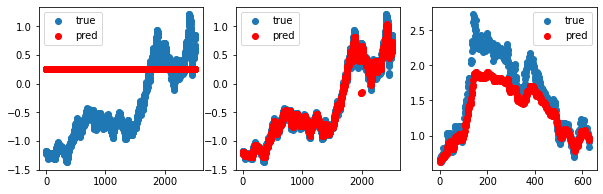

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정


# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LSTM(num_classes=1, input_size=7, hidden_size=25, num_layers=1)
preds = model(x_train)

fig, ax = plt.subplots(1,3, figsize=(10,3))

show_predicted(np.arange(0, x_train.shape[0]), y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost: {cost.item():.6f}')

preds = model(x_train)
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
show_predicted(range(x_test.shape[0]), y_test, preds_test.detach().numpy(),ax[2])

# Libarary 선언 및 데이터 생성

In [ ]:
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(list(model.parameters()))

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.02)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.__version__

'1.13.0+cu116'

In [ ]:
# NN은 학습 시 Random 하게 Weight를 생성합니다. 
# manual_seed를 강제로 주면 재실행시 같은 결과를 나오게 할 수 있습니다
torch.manual_seed(1)

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 5.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

%matplotlib inline
sklearn.__version__

'1.0.2'

In [ ]:



  return X_train, X_test, y_train, y_test

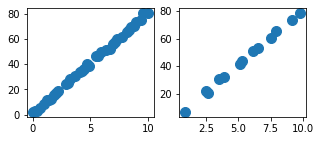

In [ ]:
X,y = get_dataset(type='linear', number_of_datapoint=50)
X_train, X_test, y_train, y_test = get_train_testset(X,y, show=True)

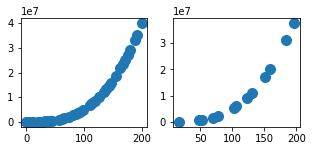

In [ ]:
X,y = get_dataset(type='poly', number_of_datapoint=50)
X_train, X_test, y_train, y_test = get_train_testset(X,y, show=True)

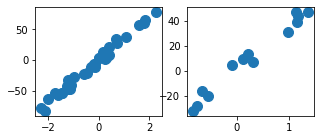

# Pytorch기반으로 단순한 수식 풀기
#### Learning Rate 이 바뀌 었을 때 어떻게 학습 되는지 확인

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1000 W: 1.971, b: 0.066 Cost: 0.000633


In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.5)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 9.333, b: 4.000 Cost: 18.666666
Epoch  100/1000 W: nan, b: nan Cost: nan
Epoch  200/1000 W: nan, b: nan Cost: nan
Epoch  300/1000 W: nan, b: nan Cost: nan
Epoch  400/1000 W: nan, b: nan Cost: nan
Epoch  500/1000 W: nan, b: nan Cost: nan
Epoch  600/1000 W: nan, b: nan Cost: nan
Epoch  700/1000 W: nan, b: nan Cost: nan
Epoch  800/1000 W: nan, b: nan Cost: nan
Epoch  900/1000 W: nan, b: nan Cost: nan
Epoch 1000/1000 W: nan, b: nan Cost: nan


# nn.Linear 를 이용하여 문제 해결

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(list(model.parameters()))

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.02)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) 

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

NameError: ignored

# 실제 활용하기 위해서는 Class로 선언해야 함

In [ ]:
class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
      return self.linear(x)

In [ ]:
model = LinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 15.171722
Epoch  100/2000 Cost: 0.006754
Epoch  200/2000 Cost: 0.004174
Epoch  300/2000 Cost: 0.002579
Epoch  400/2000 Cost: 0.001594
Epoch  500/2000 Cost: 0.000985
Epoch  600/2000 Cost: 0.000609
Epoch  700/2000 Cost: 0.000376
Epoch  800/2000 Cost: 0.000232
Epoch  900/2000 Cost: 0.000144
Epoch 1000/2000 Cost: 0.000089
Epoch 1100/2000 Cost: 0.000055
Epoch 1200/2000 Cost: 0.000034
Epoch 1300/2000 Cost: 0.000021
Epoch 1400/2000 Cost: 0.000013
Epoch 1500/2000 Cost: 0.000008
Epoch 1600/2000 Cost: 0.000005
Epoch 1700/2000 Cost: 0.000003
Epoch 1800/2000 Cost: 0.000002
Epoch 1900/2000 Cost: 0.000001
Epoch 2000/2000 Cost: 0.000001


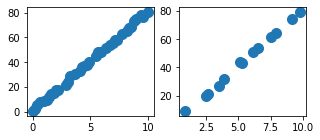

In [ ]:
X,y = get_dataset(type='linear', number_of_datapoint=50)
x_train, x_test, y_train, y_test = get_train_testset(X,y, tensor=True, show=True)

In [ ]:
model = LinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001) 

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

# 평가데이터에 대한 성능 평가 
print (f"[Test Error] MSE {F.mse_loss(model(x_test), y_test)}")
print (f"[Test Error] MSE {F.mse_loss(model(x_test), y_test)}")

Epoch    0/2000 Cost: 2429.072021
Epoch  100/2000 Cost: 637.396606
Epoch  200/2000 Cost: 167.927689
Epoch  300/2000 Cost: 44.913235
Epoch  400/2000 Cost: 12.679220
Epoch  500/2000 Cost: 4.232242
Epoch  600/2000 Cost: 2.018048
Epoch  700/2000 Cost: 1.437052
Epoch  800/2000 Cost: 1.283988
Epoch  900/2000 Cost: 1.243068
Epoch 1000/2000 Cost: 1.231545
Epoch 1100/2000 Cost: 1.227730
Epoch 1200/2000 Cost: 1.225943
Epoch 1300/2000 Cost: 1.224696
Epoch 1400/2000 Cost: 1.223603
Epoch 1500/2000 Cost: 1.222554
Epoch 1600/2000 Cost: 1.221527
Epoch 1700/2000 Cost: 1.220514
Epoch 1800/2000 Cost: 1.219511
Epoch 1900/2000 Cost: 1.218520
Epoch 2000/2000 Cost: 1.217543
1.1434857845306396


# K-fold Cross Validation

https://medium.com/dataseries/k-fold-cross-validation-with-pytorch-and-sklearn-d094aa00105f

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
import random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from torch.nn import functional as F
import torchvision
from torchvision import datasets,transforms
import torchvision.transforms as transforms


train_dataset = torchvision.datasets.MNIST('classifier_data', train=True, download=True)
test_dataset  = torchvision.datasets.MNIST('classifier_data', train=False, download=True)

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

train_dataset.transform=transform
test_dataset.transform=transform

m=len(train_dataset)

class ConvNet(nn.Module):
    def __init__(self,h1=96):
        # We optimize dropout rate in a convolutional neural network.
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.drop1=nn.Dropout2d(p=0.5)   

        self.fc1 = nn.Linear(32 * 7 * 7, h1)
        self.drop2=nn.Dropout2d(p=0.1)

        self.fc2 = nn.Linear(h1, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x),kernel_size = 2))

        x = F.relu(F.max_pool2d(self.conv2(x),kernel_size = 2))
        x = self.drop1(x)

        x = x.view(x.size(0),-1)

        x = F.relu(self.fc1(x))
        x = self.drop2(x)

        x = self.fc2(x)

        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
criterion = nn.CrossEntropyLoss()

dataset = ConcatDataset([train_dataset, test_dataset])

num_epochs=10
batch_size=128
k=10
splits=KFold(n_splits=k,shuffle=True,random_state=42)
foldperf={}


def train_epoch(model,device,dataloader,loss_fn,optimizer):
    train_loss,train_correct=0.0,0
    model.train()
    for images, labels in dataloader:

        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
        scores, predictions = torch.max(output.data, 1)
        train_correct += (predictions == labels).sum().item()

    return train_loss,train_correct
  
def valid_epoch(model,device,dataloader,loss_fn):
    valid_loss, val_correct = 0.0, 0
    model.eval()
    for images, labels in dataloader:

        images,labels = images.to(device),labels.to(device)
        output = model(images)
        loss=loss_fn(output,labels)
        valid_loss+=loss.item()*images.size(0)
        scores, predictions = torch.max(output.data,1)
        val_correct+=(predictions == labels).sum().item()

    return valid_loss,val_correct

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting classifier_data/MNIST/raw/train-images-idx3-ubyte.gz to classifier_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting classifier_data/MNIST/raw/train-labels-idx1-ubyte.gz to classifier_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting classifier_data/MNIST/raw/t10k-images-idx3-ubyte.gz to classifier_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting classifier_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to classifier_data/MNIST/raw



In [ ]:
history = {'train_loss': [], 'test_loss': [],'train_acc':[],'test_acc':[]}

for fold, (train_idx,val_idx) in enumerate(splits.split(np.arange(len(dataset)))):

    print('Fold {}'.format(fold + 1))

    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(val_idx)
    train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
    test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)
    
    model = ConvNet()
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.002)

    for epoch in range(num_epochs):
        train_loss, train_correct=train_epoch(model,device,train_loader,criterion,optimizer)
        test_loss, test_correct=valid_epoch(model,device,test_loader,criterion)

        train_loss = train_loss / len(train_loader.sampler)
        train_acc = train_correct / len(train_loader.sampler) * 100
        test_loss = test_loss / len(test_loader.sampler)
        test_acc = test_correct / len(test_loader.sampler) * 100

        print("Epoch:{}/{} AVG Training Loss:{:.3f} AVG Test Loss:{:.3f} AVG Training Acc {:.2f} % AVG Test Acc {:.2f} %".format(epoch + 1,
                                                                                                             num_epochs,
                                                                                                             train_loss,
                                                                                                             test_loss,
                                                                                                             train_acc,
                                                                                                             test_acc))
        history['train_loss'].append(train_loss)
        history['test_loss'].append(test_loss)
        history['train_acc'].append(train_acc)
        history['test_acc'].append(test_acc)   

Fold 1


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch:1/10 AVG Training Loss:0.232 AVG Test Loss:0.082 AVG Training Acc 92.93 % AVG Test Acc 97.41 %
Epoch:2/10 AVG Training Loss:0.076 AVG Test Loss:0.046 AVG Training Acc 97.68 % AVG Test Acc 98.50 %
Epoch:3/10 AVG Training Loss:0.060 AVG Test Loss:0.044 AVG Training Acc 98.21 % AVG Test Acc 98.40 %
Epoch:4/10 AVG Training Loss:0.050 AVG Test Loss:0.037 AVG Training Acc 98.48 % AVG Test Acc 98.66 %
Epoch:5/10 AVG Training Loss:0.042 AVG Test Loss:0.031 AVG Training Acc 98.65 % AVG Test Acc 98.89 %
Epoch:6/10 AVG Training Loss:0.037 AVG Test Loss:0.038 AVG Training Acc 98.88 % AVG Test Acc 98.83 %
Epoch:7/10 AVG Training Loss:0.035 AVG Test Loss:0.036 AVG Training Acc 98.91 % AVG Test Acc 98.94 %
Epoch:8/10 AVG Training Loss:0.035 AVG Test Loss:0.035 AVG Training Acc 98.90 % AVG Test Acc 98.96 %
Epoch:9/10 AVG Training Loss:0.029 AVG Test Loss:0.035 AVG Training Acc 99.06 % AVG Test Acc 98.90 %
Epoch:10/10 AVG Training Loss:0.030 AVG Test Loss:0.027 AVG Training Acc 99.05 % AVG Test A

In [ ]:
avg_train_loss = np.mean(history['train_loss'])
avg_test_loss = np.mean(history['test_loss'])
avg_train_acc = np.mean(history['train_acc'])
avg_test_acc = np.mean(history['test_acc'])

print('Performance of {} fold cross validation'.format(k))
print("Average Training Loss: {:.4f} \t Average Test Loss: {:.4f} \t Average Training Acc: {:.3f} \t Average Test Acc: {:.3f}".format(avg_train_loss,avg_test_loss,avg_train_acc,avg_test_acc)) 

Performance of 10 fold cross validation
Average Training Loss: 0.0641 	 Average Test Loss: 0.0382 	 Average Training Acc: 98.013 	 Average Test Acc: 98.878


## Machine Learning
$y=8x+1$ 과 $y=2x^2 + 5x + 3$ 으로 데이터를 만들고 regression을 수행한다. Regression은 입력의 특징(=통계적)을 파악하기 위해 minimize the sum of squared errors $\sum_i (y[i] - \hat{y}[i])^2$ 를 수행한다. $\hat{y}$ 이 예측값이다. 

1. linear regression
2. Polynomial regression
3. Decision Tree

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 4.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


'1.2.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [ ]:




def train_regressor(X_train, y_train, regression_model=LinearRegression()):

  model = regression_model

  model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1)) # 학습을 수행
  
  return model

def test_regressor(model, X_test, y_test):
  y_pred = model.predict(X_test.reshape(-1,1)) # 예측값 생성

  print("Coefficients: \n", model.coef_) # 어떤 값이 coefficient인지 확인

  print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
  plt.scatter(X_test, y_test, color="black")
  plt.plot(X_test, y_pred, color="blue", linewidth=3)



  

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

print(X_train.shape)

(750, 1)


(-0.1683275562485818,
 0.16613389615969384,
 -0.15115438149608185,
 0.15525245571029833)

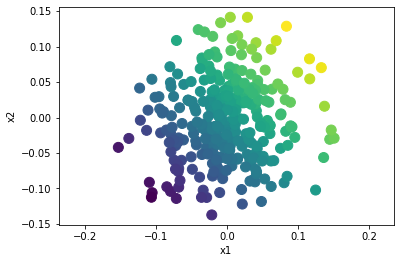

In [ ]:
X, y, c = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, tail_strength=1, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")

# Machine Learning
1. 실수와 카테고리 인자가 섞여 있는 경우에는 one-hot embedding
2. 실수값들의 range가 다른 경우에는 Standarzation vs. Normazliation
3. 여러 작업을 한꺼번에 처리해 주는 Pipeline
4. 예측오차는 왜 MSE 로 계산되는가?
5. 모델의 성능 평가는 어떻게 하는가? CrossValidation으로 한다



# Neural Network 
1. Gradient Descent
2. Learning Rate
3. Batch Size
4. Optimization
 * Stochastic Gradient Descent
 * momentum
5. 위의 문제를 Neural Network로 풀어본다


In [ ]:
# 임의의 합성 데이터를 만드는 함수 입니다. 
def get_dataset(type='linear', number_of_datapoint=10):
  
  if type == 'linear':
    n=number_of_datapoint   # Number of data points
    X=np.linspace(0, 10, n)
    y=X*8 + 1 + 1*np.random.randn(n) # Standard deviation 1
    return X,y

  elif type == 'poly':
    n=number_of_datapoint   # Number of data points
    X=np.linspace(0, 200, n)
    y = 5*X*X*X + X*X*2 + X*5 + 3 + 1*np.random.randn(n) # Standard deviation 1
    return X,y

  else:
    # just random generation
    X, y = make_regression(n_samples=number_of_datapoint, n_features=1, bias=0, noise=5)
    return X,y
